In [1]:
# Load libraries
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Inspect the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
# Reshape the data and normalize
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [6]:
cnn = Sequential()
cnn.add(Input(shape=(28,28,1)))
cnn.add(Conv2D(32, kernel_size=(5,5), padding='same', activation='relu'))

In [7]:
cnn.add(MaxPooling2D())

# Default arguments for MaxPooling2D are pool_size=(2, 2), strides=None, padding='valid', data_format=None

In [8]:
cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))

In [9]:
cnn.add(MaxPooling2D())

In [10]:
cnn.add(Flatten())

In [11]:
cnn.add(Dense(1024, activation='relu'))

In [12]:
cnn.add(Dense(10, activation='softmax'))

In [13]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
print(cnn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       3,212,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,274,634 (12.49 MB)

 Trainable params: 3,274,634 (12.49 MB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
history_cnn = cnn.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_train,y_train))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9338 - loss: 0.2110 - val_accuracy: 0.9901 - val_loss: 0.0326
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9891 - loss: 0.0347 - val_accuracy: 0.9921 - val_loss: 0.0249
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9951 - val_loss: 0.0166
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9967 - val_loss: 0.0102
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9964 - loss: 0.0120 - val_accuracy: 0.9951 - val_loss: 0.0141


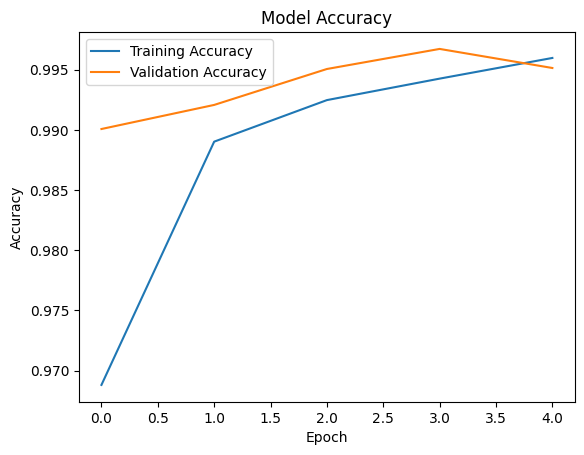

In [21]:
# Plot the training and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
# Get the final training and validation accuracy
final_training_accuracy = history_cnn.history['accuracy'][-1]
final_validation_accuracy = history_cnn.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Validation Accuracy: {final_validation_accuracy}")

Final Training Accuracy: 0.9959666728973389
Final Validation Accuracy: 0.9951333403587341


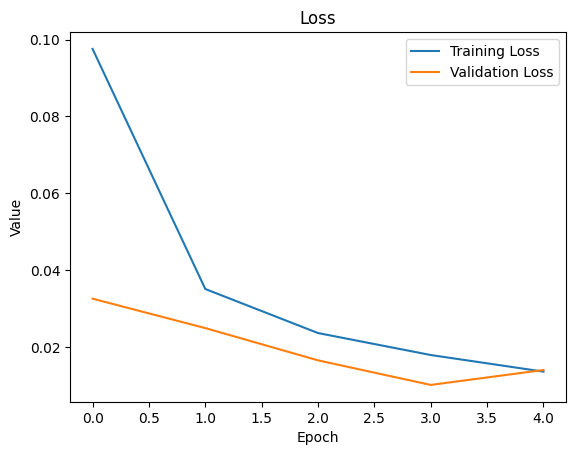

In [24]:
# Plot loss
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()

In [25]:
score = cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0573


In [26]:
score

[0.04103100299835205, 0.9890999794006348]